In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='basic2'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


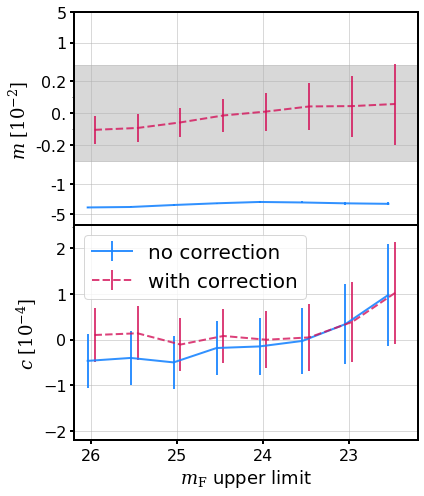

In [7]:
outcomes=fitsio.read('detect_magcut.fits')
ave=np.average(outcomes,axis=0)
std=np.std(outcomes,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outcomes))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outcomes))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(22.2,26.2)
ax.set_ylim(-10,5.)
ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(22.2,26.2)
ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)
fig.savefig('detect_magcut.pdf')

In [8]:
len(outcomes)

1000

In [9]:
yerr

array([0.00088746, 0.00089067, 0.00091995, 0.00101745, 0.00118431,
       0.00148405, 0.0019024 , 0.00257015])

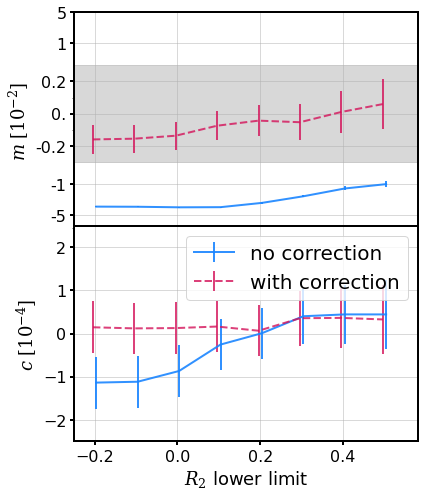

In [10]:
outcomes=fitsio.read('detect_r2cut.fits')
ave=np.average(outcomes,axis=0)
std=np.std(outcomes,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
yerr=std[1,:]/ave[5,:]/0.04/np.sqrt(len(outcomes))
zerr=std[3,:]/ave[5,:]/np.sqrt(len(outcomes))
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$R_{2}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-10,5.)
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-2.5,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
plt.tight_layout(h_pad=-0.2)
fig.savefig('detect_r2cut.pdf')